<a href="https://colab.research.google.com/github/Nandakishore630/ML-Project/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: connect to git

# Clone the entire repo.
!git clone https://github.com/YOUR_USER/YOUR_REPO.git

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
df['time_signature'].unique()

array([4., 3., 5., 1.])

In [ ]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
del df['Unnamed: 0']

In [ ]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
df.isna().sum()

,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


In [ ]:
df.duplicated(subset='song_title').sum()

np.int64(61)

In [ ]:
len(df['song_title'].unique())

1956

In [ ]:
df.drop_duplicates(subset='song_title', inplace=True)


In [ ]:
df.describe()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1956.000000,1956.000000,1.956000e+03,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.187212,0.618486,2.458647e+05,0.682956,0.133045,5.339468,0.190369,-7.071711,0.611963,0.092580,121.796418,3.967280,0.499849,0.503067
std,0.259358,0.160638,8.157698e+04,0.210331,0.272996,3.649237,0.155814,3.777254,0.487428,0.089479,26.793872,0.257775,0.247257,0.500118
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009470,0.514000,1.996798e+05,0.564000,0.000000,2.000000,0.092200,-8.379750,0.000000,0.037500,100.251750,4.000000,0.298000,0.000000
50%,0.063050,0.631000,2.290130e+05,0.717000,0.000076,6.000000,0.125500,-6.245500,1.000000,0.054950,121.976500,4.000000,0.496000,1.000000
75%,0.265000,0.738000,2.703565e+05,0.847250,0.054075,9.000000,0.243750,-4.728500,1.000000,0.108000,137.982250,4.000000,0.694250,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


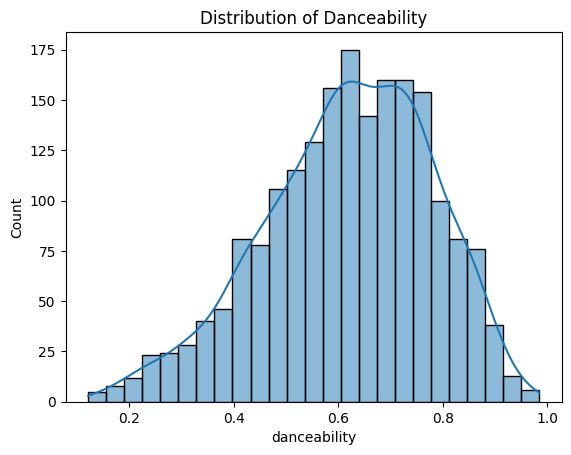

In [ ]:
sns.histplot(df['danceability'], kde=True)
plt.title('Distribution of Danceability')

plt.show()

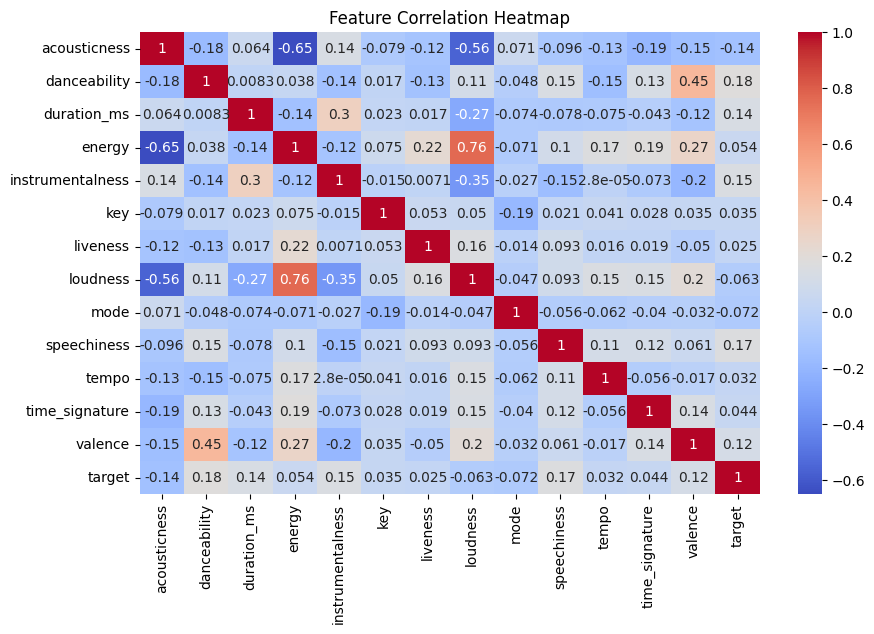

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

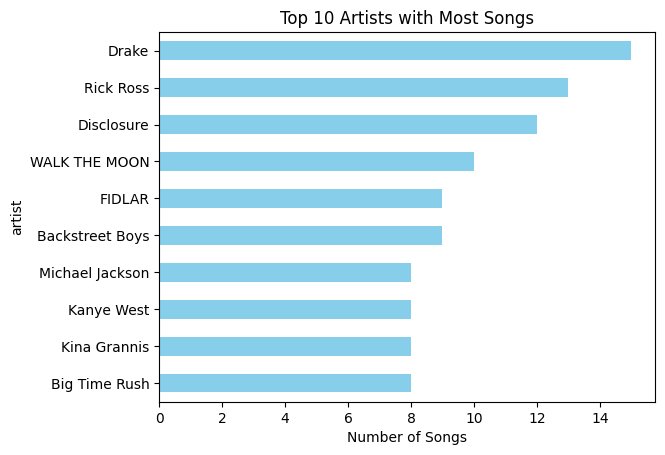

In [ ]:
top_artists = df['artist'].value_counts().head(10)

top_artists.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Songs")
plt.title("Top 10 Artists with Most Songs")
plt.gca().invert_yaxis()
plt.show()


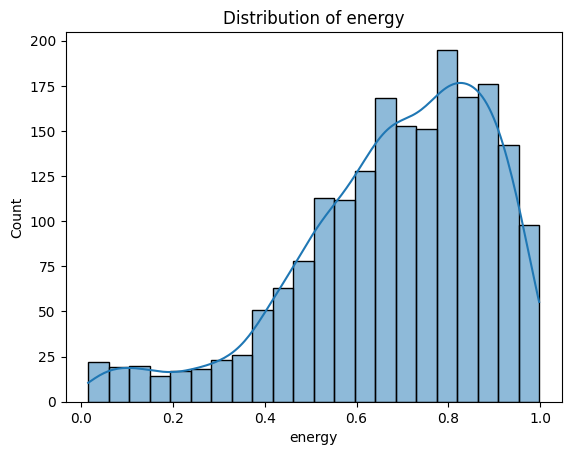

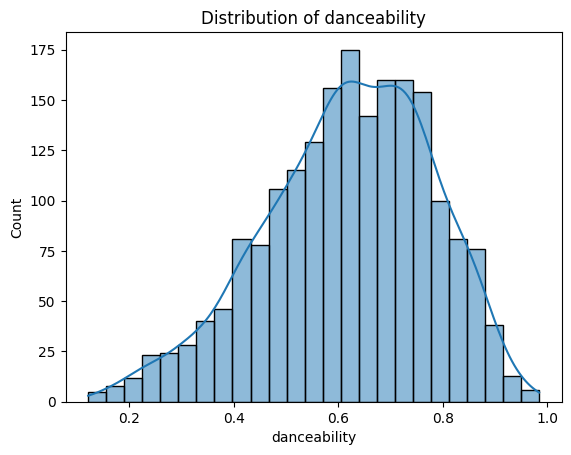

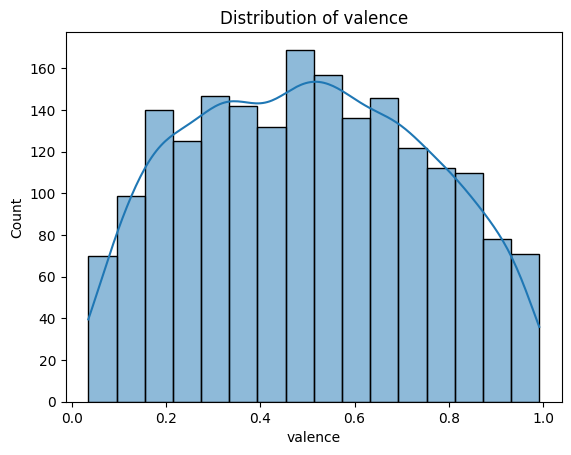

In [ ]:
for feature in ['energy', 'danceability', 'valence']:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

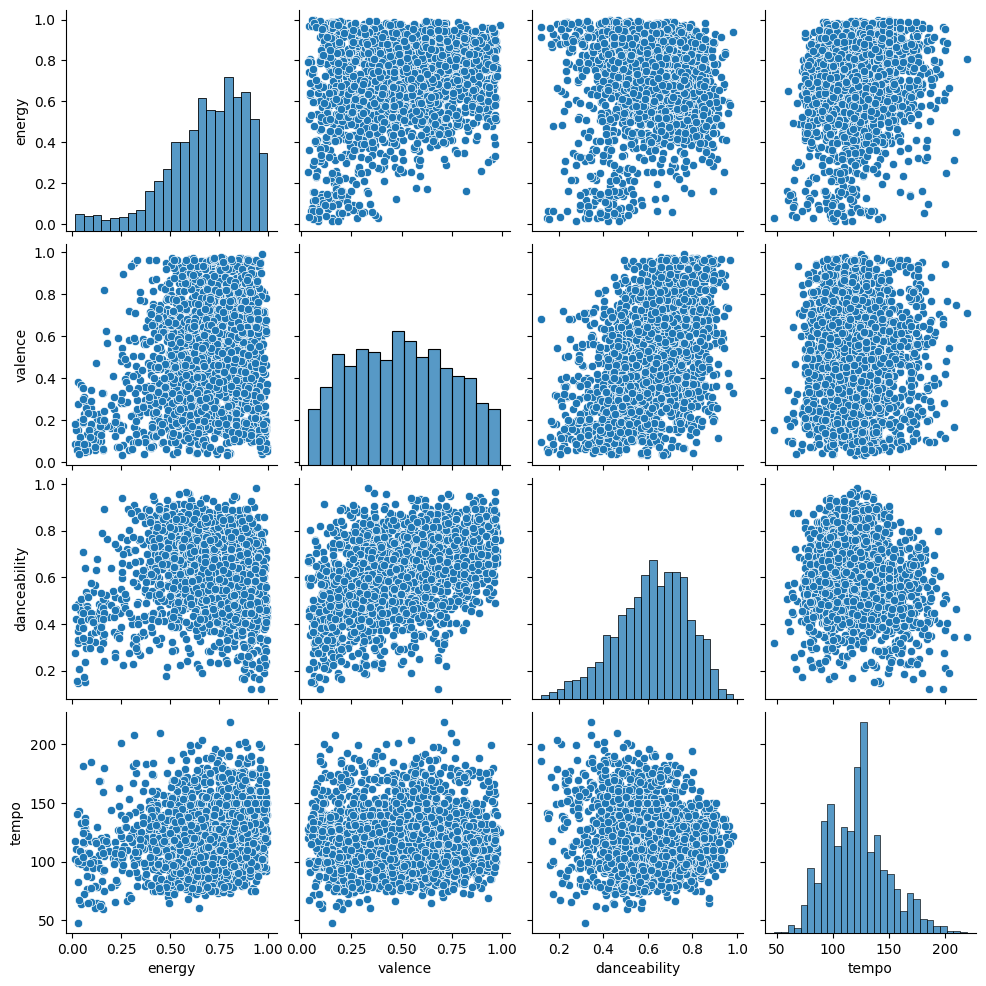

In [ ]:
sns.pairplot(df[['energy', 'valence', 'danceability', 'tempo']])
plt.show()

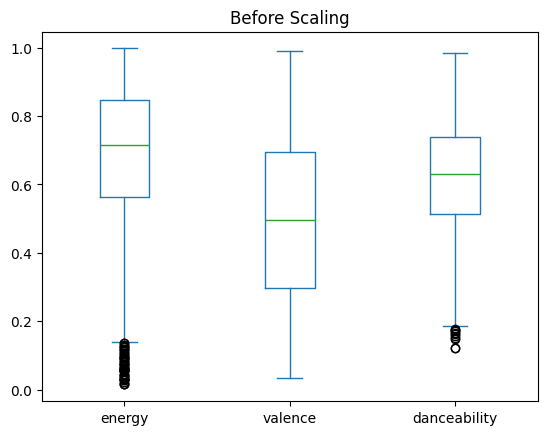

In [ ]:
df[['energy', 'valence', 'danceability']].plot(kind='box', title='Before Scaling')
plt.show()

In [ ]:
df.shape

(1956, 16)

In [ ]:
features= df[['acousticness', 'danceability', 'energy', 'instrumentalness',
               'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

In [ ]:
features.shape

(1956, 9)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
scaled = scaler.fit_transform(df[['energy', 'valence', 'danceability']])

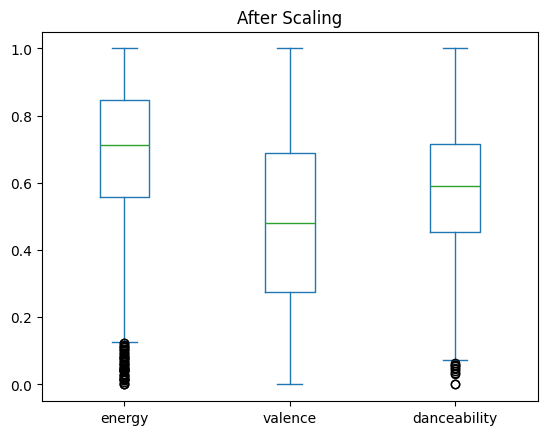

In [ ]:
pd.DataFrame(scaled, columns=['energy', 'valence', 'danceability']).plot(kind='box', title='After Scaling')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(features_scaled)

# Add index column for retrieval
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
def recommend_song(song_name, n=5):
    if song_name not in df['song_title'].values:
        return ["Song not found."]

    idx = df[df['song_title'] == song_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_songs = sorted_scores[1:n+1]

    recommendations = []
    for i in top_songs:
        track = df.iloc[i[0]]['song_title']
        artist = df.iloc[i[0]]['artist']
        recommendations.append(f"{track} by {artist}")

    return recommendations


In [ ]:
recommend_song("Redbone")


['Tu Foto by Ozuna',
 'My Main by Mykfresh',
 'Dopeman by Vince Staples',
 'Talk by 10cm',
 'Johnny Was by Bob Marley & The Wailers']

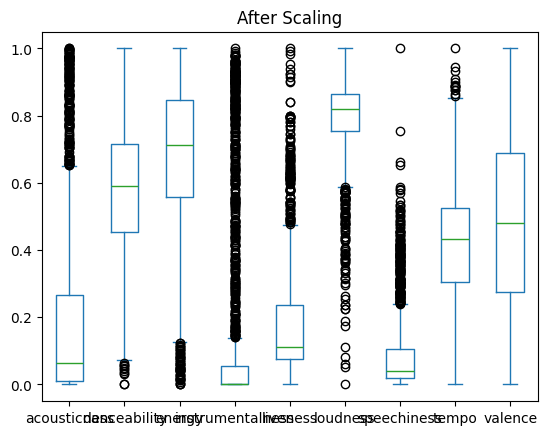

In [ ]:
features_to_scale = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
scaled = scaler.fit_transform(df[features_to_scale])

# This time give all 9 column names
pd.DataFrame(scaled, columns=features_to_scale).plot(kind='box', title='After Scaling')
plt.show()


In [ ]:
def recommend_song(song_name, n=5):
    if song_name not in df['song_title'].values:
        return ["Song not found."]

    idx = df[df['song_title'] == song_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_songs = sorted_scores[1:n+1]

    recommendations = []
    for i in top_songs:
        track = df.iloc[i[0]]['song_title']
        artist = df.iloc[i[0]]['artist']
        recommendations.append(f"{track} by {artist}")

    return recommendations


In [ ]:
recommend_song('')

In [ ]:
%%writefile app.py
import streamlit as st
st.title("🎵 Song Recommendation System")
song_name = st.text_input("Enter a song title")

if st.button("Recommend"):
    if song_name:
        results = recommend_song(song_name, 5)
        st.subheader("Recommended Songs:")
        for song in results:
            st.write("• " + song)
    else:
        st.warning("Please enter a song title.")

Writing app.py


In [ ]:
!pip install streamlit

In [ ]:

!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 3s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋npm notice
npm notice New major version of npm available! 10.8.2 -> 11.4.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.4.1
npm notice To update run: npm install -g npm@11.4.1
npm notice
⠋

In [ ]:
st.title("🎵 Song Recommendation System")


2025-05-26 09:33:04.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-26 09:33:04.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.72.78:8501

your url is: https://dirty-insects-walk.loca.lt
  Stopping...
^C


In [ ]:
recommend_song("Shape of You")

['Billie Jean by Michael Jackson',
 'Wildside - From "Adventures in Babysitting" by Sofia Carson',
 'Pieces by Tanlines',
 'Somebody by Natalie La Rose',
 "That's What I Like by Bruno Mars"]

In [ ]:
recommend_song("Parallel Lines")

['Had Ten Dollaz by Cherry Glazerr',
 'Inspector Norse by Todd Terje',
 'All My Friends by LCD Soundsystem',
 'Bang A Gong [Get It On] (Remastered Single/LP Version) by T. Rex',
 'Make It by Patrick Di Stefano']

In [ ]:
recommend_song("Redbone")

['Tu Foto by Ozuna',
 'My Main by Mykfresh',
 'Dopeman by Vince Staples',
 'Talk by 10cm',
 'Johnny Was by Bob Marley & The Wailers']